<a href="https://colab.research.google.com/github/VideoPac/hello-world/blob/master/SparringGrinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install poker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 930.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 9.8 MB/s eta 0:00:00


In [2]:
!pip install eval7


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.6/591.6 kB 12.5 MB/s eta 0:00:00


In [4]:
import eval7

# Créer un deck
deck = eval7.Deck()
deck.shuffle()

# Distribuer une main de 7 cartes
hand = deck.deal(7)
print(hand)

# Évaluer la main
hand_value = eval7.evaluate(hand)
hand_type = eval7.handtype(hand_value)
print(f"Valeur de la main : {hand_value}, Type de main : {hand_type}")


[Card("As"), Card("Jh"), Card("7s"), Card("3h"), Card("Qh"), Card("Ks"), Card("8h")]
Valeur de la main : 834198, Type de main : High Card


In [5]:
import eval7
from itertools import combinations
import time

def generate_boards(deck, hand1, hand2):
    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    # Enlever les cartes des mains du deck
    for card in hand1_cards + hand2_cards:
        deck.cards.remove(card)

    # Générer toutes les combinaisons de 5 cartes sans les cartes des mains
    board_combinations = list(combinations(deck.cards, 5))

    return board_combinations

def evaluate_boards(hand1, hand2, board_combinations):
    hand1_wins = 0
    hand2_wins = 0
    ties = 0

    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    for board in board_combinations:
        hand1_value = eval7.evaluate(hand1_cards + list(board))
        hand2_value = eval7.evaluate(hand2_cards + list(board))

        if hand1_value > hand2_value:
            hand1_wins += 1
        elif hand2_value > hand1_value:
            hand2_wins += 1
        else:
            ties += 1

    return hand1_wins, hand2_wins, ties

def calculate_equity(hand1, hand2):
    start_time = time.time()

    deck = eval7.Deck()
    board_combinations = generate_boards(deck, hand1, hand2)
    hand1_wins, hand2_wins, ties = evaluate_boards(hand1, hand2, board_combinations)

    total = hand1_wins + hand2_wins + ties
    hand1_equity = (hand1_wins + ties / 2) / total * 100
    hand2_equity = (hand2_wins + ties / 2) / total * 100

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time: {execution_time:.4f} seconds")

    return round(hand1_equity, 2), round(hand2_equity, 2)

# Exemple d'utilisation
hand1 = ['Ah', 'As']
hand2 = ['Kh', 'Ks']
equity = calculate_equity(hand1, hand2)
print(f"Équité pour {hand1}: {equity[0]:.2f}%")
print(f"Équité pour {hand2}: {equity[1]:.2f}%")


Execution time: 6.4853 seconds
Équité pour ['Ah', 'As']: 82.64%
Équité pour ['Kh', 'Ks']: 17.36%


In [6]:
import eval7
from itertools import combinations
import pandas as pd

# Créer les en-têtes pour les lignes et les colonnes
ranks = ['AA', 'KK', 'QQ', 'JJ', 'TT', '99', '88', '77', '66', '55', '44', '33', '22']

# Initialiser un DataFrame vide avec les en-têtes appropriées
equity_df = pd.DataFrame(index=ranks, columns=ranks)

# Remplir la diagonale avec None
for i in range(len(ranks)):
    equity_df.iloc[i, i] = None

# Fonction pour générer toutes les combinaisons de boards
def generate_boards(deck, hand1, hand2):
    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    for card in hand1_cards + hand2_cards:
        deck.cards.remove(card)

    board_combinations = list(combinations(deck.cards, 5))
    return board_combinations

# Fonction pour évaluer les boards
def evaluate_boards(hand1, hand2, board_combinations):
    hand1_wins = 0
    hand2_wins = 0
    ties = 0

    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    for board in board_combinations:
        hand1_value = eval7.evaluate(hand1_cards + list(board))
        hand2_value = eval7.evaluate(hand2_cards + list(board))

        if hand1_value > hand2_value:
            hand1_wins += 1
        elif hand2_value > hand1_value:
            hand2_wins += 1
        else:
            ties += 1

    return hand1_wins, hand2_wins, ties

# Fonction pour calculer l'équité
def calculate_equity(hand1, hand2):
    deck = eval7.Deck()
    board_combinations = generate_boards(deck, hand1, hand2)
    hand1_wins, hand2_wins, ties = evaluate_boards(hand1, hand2, board_combinations)

    total = hand1_wins + hand2_wins + ties
    hand1_equity = (hand1_wins + ties / 2) / total * 100
    hand2_equity = (hand2_wins + ties / 2) / total * 100

    return round(hand1_equity, 2), round(hand2_equity, 2)

# Remplir le tableau avec les équités des matchup de pocket pairs
for i in range(1, len(ranks)):
    for j in range(i):
        hand1 = [ranks[i][0] + 's', ranks[i][0] + 'h']
        hand2 = [ranks[j][0] + 's', ranks[j][0] + 'h']
        equity1, equity2 = calculate_equity(hand1, hand2)
        equity_df.iloc[i, j] = equity1
        equity_df.iloc[j, i] = equity2

# Afficher le DataFrame
print(equity_df)


       AA     KK     QQ     JJ     TT     99     88     77     66     55  \
AA   None  82.64  82.23  81.82  81.41  81.53  81.12  81.14  81.11  81.55   
KK  17.36   None  82.62  82.22  81.81  81.48  81.54  81.13  81.15  81.14   
QQ  17.77  17.38   None  82.66  82.25  81.86  81.54  81.59  81.18  81.17   
JJ  18.18  17.78  17.34   None  82.68  82.29  81.91  81.58  81.63   81.2   
TT  18.59  18.19  17.75  17.32   None  82.69  82.31  81.92   81.6  81.62   
99  18.47  18.52  18.14  17.71  17.31   None  82.63  82.24  81.86   81.5   
88  18.88  18.46  18.46  18.09  17.69  17.37   None  82.51  82.13  81.71   
77  18.86  18.87  18.41  18.42  18.08  17.76  17.49   None  82.33  81.92   
66  18.89  18.85  18.82  18.37   18.4  18.14  17.87  17.67   None  82.05   
55  18.45  18.86  18.83   18.8  18.38   18.5  18.29  18.08  17.95   None   
44   18.0  18.42  18.38  18.36  18.36  18.02  18.19  18.04  17.91  17.83   
33  17.56  17.97  17.94  17.91  17.92   18.0  17.71  17.94  17.87  17.79   
22  17.11  1

In [8]:
import eval7
from itertools import combinations
import pandas as pd

# Créer les en-têtes pour les lignes et les colonnes
ranks = ['AA', 'KK', 'QQ', 'JJ', 'TT', '99', '88', '77', '66', '55', '44', '33', '22']

# Initialiser un DataFrame vide avec les en-têtes appropriées
equity_diff_color_df = pd.DataFrame(index=ranks, columns=ranks)

# Remplir la diagonale avec None
for i in range(len(ranks)):
    equity_diff_color_df.iloc[i, i] = None

# Fonction pour générer toutes les combinaisons de boards
def generate_boards(deck, hand1, hand2):
    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    for card in hand1_cards + hand2_cards:
        deck.cards.remove(card)

    board_combinations = list(combinations(deck.cards, 5))
    return board_combinations

# Fonction pour évaluer les boards
def evaluate_boards(hand1, hand2, board_combinations):
    hand1_wins = 0
    hand2_wins = 0
    ties = 0

    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    for board in board_combinations:
        hand1_value = eval7.evaluate(hand1_cards + list(board))
        hand2_value = eval7.evaluate(hand2_cards + list(board))

        if hand1_value > hand2_value:
            hand1_wins += 1
        elif hand2_value > hand1_value:
            hand2_wins += 1
        else:
            ties += 1

    return hand1_wins, hand2_wins, ties

# Fonction pour calculer l'équité
def calculate_equity(hand1, hand2):
    deck = eval7.Deck()
    board_combinations = generate_boards(deck, hand1, hand2)
    hand1_wins, hand2_wins, ties = evaluate_boards(hand1, hand2, board_combinations)

    total = hand1_wins + hand2_wins + ties
    hand1_equity = (hand1_wins + ties / 2) / total * 100
    hand2_equity = (hand2_wins + ties / 2) / total * 100

    return round(hand1_equity, 2), round(hand2_equity, 2)

# Remplir le tableau avec les équités des matchup de pocket pairs avec couleurs différentes
for i in range(1, len(ranks)):
    for j in range(i):
        hand1 = [ranks[i][0] + 's', ranks[i][0] + 'h']
        hand2 = [ranks[j][0] + 's', ranks[j][0] + 'd']
        equity1, equity2 = calculate_equity(hand1, hand2)
        equity_diff_color_df.iloc[i, j] = equity1
        equity_diff_color_df.iloc[j, i] = 100 - equity1

# Afficher le DataFrame
print(equity_diff_color_df)


       AA     KK     QQ     JJ     TT     99     88     77     66     55  \
AA   None  81.95  81.55  81.15  80.75  80.86  80.46  80.48  80.46  80.89   
KK  18.05   None  81.93  81.54  81.14  80.82  80.87  80.47  80.49  80.48   
QQ  18.45  18.07   None  81.97  81.57  81.19  80.87  80.92  80.53  80.52   
JJ  18.85  18.46  18.03   None  81.99  81.61  81.23  80.91  80.97  80.54   
TT  19.25  18.86  18.43  18.01   None   82.0  81.62  81.25  80.93  80.96   
99  19.14  19.18  18.81  18.39   18.0   None  81.94  81.56  81.18  80.84   
88  19.54  19.13  19.13  18.77  18.38  18.06   None  81.82  81.44  81.04   
77  19.52  19.53  19.08  19.09  18.75  18.44  18.18   None  81.64  81.24   
66  19.54  19.51  19.47  19.03  19.07  18.82  18.56  18.36   None  81.36   
55  19.11  19.52  19.48  19.46  19.04  19.16  18.96  18.76  18.64   None   
44  18.67  19.08  19.04  19.02  19.02  18.69  18.86  18.72   18.6  18.52   
33  18.23  18.63   18.6  18.58  18.58  18.66  18.38  18.61  18.55  18.48   
22  17.78  1

In [9]:
import eval7
from itertools import combinations
import pandas as pd

# Créer les en-têtes pour les lignes et les colonnes
ranks = ['AA', 'KK', 'QQ', 'JJ', 'TT', '99', '88', '77', '66', '55', '44', '33', '22']

# Initialiser un DataFrame vide avec les en-têtes appropriées
equity_diff_suit_df = pd.DataFrame(index=ranks, columns=ranks)

# Remplir la diagonale avec None
for i in range(len(ranks)):
    equity_diff_suit_df.iloc[i, i] = None

# Fonction pour générer toutes les combinaisons de boards
def generate_boards(deck, hand1, hand2):
    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    for card in hand1_cards + hand2_cards:
        deck.cards.remove(card)

    board_combinations = list(combinations(deck.cards, 5))
    return board_combinations

# Fonction pour évaluer les boards
def evaluate_boards(hand1, hand2, board_combinations):
    hand1_wins = 0
    hand2_wins = 0
    ties = 0

    hand1_cards = [eval7.Card(c) for c in hand1]
    hand2_cards = [eval7.Card(c) for c in hand2]

    for board in board_combinations:
        hand1_value = eval7.evaluate(hand1_cards + list(board))
        hand2_value = eval7.evaluate(hand2_cards + list(board))

        if hand1_value > hand2_value:
            hand1_wins += 1
        elif hand2_value > hand1_value:
            hand2_wins += 1
        else:
            ties += 1

    return hand1_wins, hand2_wins, ties

# Fonction pour calculer l'équité
def calculate_equity(hand1, hand2):
    deck = eval7.Deck()
    board_combinations = generate_boards(deck, hand1, hand2)
    hand1_wins, hand2_wins, ties = evaluate_boards(hand1, hand2, board_combinations)

    total = hand1_wins + hand2_wins + ties
    hand1_equity = (hand1_wins + ties / 2) / total * 100
    hand2_equity = (hand2_wins + ties / 2) / total * 100

    return round(hand1_equity, 2), round(hand2_equity, 2)

# Remplir le tableau avec les équités des matchup de pocket pairs avec toutes les couleurs différentes
for i in range(1, len(ranks)):
    for j in range(i):
        hand1 = [ranks[i][0] + 's', ranks[i][0] + 'h']
        hand2 = [ranks[j][0] + 'c', ranks[j][0] + 'd']
        equity1, equity2 = calculate_equity(hand1, hand2)
        equity_diff_suit_df.iloc[i, j] = equity1
        equity_diff_suit_df.iloc[j, i] = 100 - equity1

# Afficher le DataFrame
print(equity_diff_suit_df)


       AA     KK     QQ     JJ     TT     99     88     77     66     55  \
AA   None  81.26  80.86  80.47  80.08  80.19   79.8  79.82   79.8  80.23   
KK  18.74   None  81.24  80.85  80.46  80.15   80.2  79.81  79.84  79.83   
QQ  19.14  18.76   None  81.28  80.89  80.52   80.2  80.26  79.87  79.86   
JJ  19.53  19.15  18.72   None  81.29  80.93  80.56  80.24   80.3  79.88   
TT  19.92  19.54  19.11  18.71   None  81.31  80.94  80.57  80.26  80.29   
99  19.81  19.85  19.48  19.07  18.69   None  81.24  80.88  80.51  80.17   
88   20.2   19.8   19.8  19.44  19.06  18.76   None  81.13  80.76  80.37   
77  20.18  20.19  19.74  19.76  19.43  19.12  18.87   None  80.95  80.56   
66   20.2  20.16  20.13   19.7  19.74  19.49  19.24  19.05   None  80.67   
55  19.77  20.17  20.14  20.12  19.71  19.83  19.63  19.44  19.33   None   
44  19.34  19.73   19.7  19.68  19.68  19.36  19.53  19.39  19.28  19.22   
33   18.9  19.29  19.26  19.24  19.24  19.33  19.05  19.29  19.23  19.16   
22  18.45  1

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Renommer les DataFrames pour plus de cohérence
twosuits_df = equity_df.copy()
threesuits_df = equity_diff_color_df.copy()
foursuits_df = equity_diff_suit_df.copy()


In [16]:
import pandas as pd
import numpy as np

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Appliquer un dégradé de couleur avec des valeurs min et max définies
twosuits_styled = twosuits_df.style.background_gradient(cmap='coolwarm', axis=None, vmin=twosuits_df.min().min(), vmax=twosuits_df.max().max())

# Afficher le DataFrame stylé
twosuits_styled


<ipython-input-16-b0b17afd07be>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [14]:
# Sauvegarder le DataFrame stylé en HTML
twosuits_styled.to_html("twosuits_styled.html")

# Ou simplement afficher dans le notebook
twosuits_styled


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [17]:
twosuits_styled = twosuits_df.style.background_gradient(cmap='Spectral', axis=None, vmin=twosuits_df.min().min(), vmax=twosuits_df.max().max())
twosuits_styled


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [18]:
import numpy as np

log_twosuits_df = np.log1p(twosuits_df)  # Appliquer log(1 + x) pour éviter les valeurs log(0)
twosuits_styled = log_twosuits_df.style.background_gradient(cmap='coolwarm', axis=None, vmin=log_twosuits_df.min().min(), vmax=log_twosuits_df.max().max())
twosuits_styled


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,4.426522,4.421608,4.416670,4.411707,4.413162,4.408182,4.408425,4.408060,4.413404,4.418841,4.424128,4.429506
KK,2.910174,nan,4.426283,4.421488,4.416549,4.412556,4.413283,4.408303,4.408547,4.408425,4.413768,4.419202,4.424487
QQ,2.932260,2.911263,nan,4.426761,4.421848,4.417152,4.413283,4.413889,4.408912,4.408790,4.414252,4.419563,4.424966
JJ,2.953868,2.932792,2.909084,nan,4.427000,4.422328,4.417756,4.413768,4.414373,4.409155,4.414494,4.419924,4.425206
TT,2.975019,2.954389,2.931194,2.907993,nan,4.427119,4.422569,4.417876,4.414010,4.414252,4.414494,4.419804,4.425206
99,2.968875,2.971440,2.951780,2.929058,2.907447,nan,4.426402,4.421728,4.417152,4.412798,4.418600,4.418841,4.424248
88,2.989714,2.968361,2.968361,2.949165,2.927989,2.910719,nan,4.424966,4.420406,4.415341,4.416549,4.422328,4.422569
77,2.988708,2.989211,2.965788,2.966303,2.948641,2.931727,2.917230,nan,4.422809,4.417876,4.418359,4.419563,4.425326
66,2.990217,2.988204,2.986692,2.963725,2.965273,2.951780,2.937573,2.926918,nan,4.419443,4.419924,4.420406,4.421608
55,2.967847,2.988708,2.987196,2.985682,2.964242,2.970414,2.959587,2.948641,2.941804,nan,4.420887,4.421368,4.421848


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_twosuits_df = pd.DataFrame(scaler.fit_transform(twosuits_df), index=twosuits_df.index, columns=twosuits_df.columns)

twosuits_styled = scaled_twosuits_df.style.background_gradient(cmap='coolwarm', axis=None)
twosuits_styled


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,1.000000,0.994026,0.987144,0.980572,0.982241,0.976819,0.978939,0.981103,0.992224,0.997340,1.000000,1.000000
KK,0.140449,nan,1.000000,0.993266,0.986691,0.981476,0.983267,0.978786,0.981722,0.985848,0.990768,0.993548,0.764045
QQ,0.370787,0.000000,nan,1.000000,0.993422,0.987293,0.983267,0.985857,0.982187,0.986314,0.991394,0.994020,0.786517
JJ,0.601124,0.006129,0.000000,nan,1.000000,0.993876,0.988947,0.985703,0.989157,0.986781,0.991707,0.994493,0.797753
TT,0.831461,0.012412,0.006281,0.000000,nan,1.000000,0.995088,0.990930,0.988693,0.993313,0.991707,0.994335,0.797753
99,0.764045,0.017469,0.012255,0.005969,0.000000,nan,1.000000,0.995849,0.992720,0.991446,0.997027,0.993076,0.752809
88,0.994382,0.016549,0.017157,0.011785,0.005813,0.000000,nan,1.000000,0.996902,0.994712,0.994367,0.997640,0.674157
77,0.983146,0.022832,0.016391,0.016835,0.011779,0.005971,0.000000,nan,1.000000,0.997978,0.996714,0.994020,0.803371
66,1.000000,0.022525,0.022672,0.016070,0.016674,0.011788,0.005834,0.003228,nan,1.000000,0.998748,0.995122,0.629213
55,0.752809,0.022679,0.022825,0.022651,0.016368,0.017299,0.012281,0.009531,0.002788,nan,1.000000,0.996381,0.640449


In [20]:
import pandas as pd
import numpy as np

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Appliquer un dégradé de couleur avec des valeurs min et max définies
twosuits_styled = twosuits_df.style.background_gradient(cmap='coolwarm', axis=None, vmin=twosuits_df.min().min(), vmax=twosuits_df.max().max())

# Afficher le DataFrame stylé
twosuits_styled


<ipython-input-20-b0b17afd07be>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [21]:
import pandas as pd
import numpy as np

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Appliquer un dégradé de couleur en spécifiant les valeurs min et max
twosuits_styled = twosuits_df.style.background_gradient(
    cmap='coolwarm',
    axis=None,
    vmin=min_value,
    vmax=max_value
)

# Afficher le DataFrame stylé
twosuits_styled


<ipython-input-21-964bfe201f11>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [22]:
import pandas as pd
import numpy as np

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Fonction pour appliquer un style de dégradé personnalisé
def background_gradient_custom(s, cmap='coolwarm', low=min_value, high=max_value):
    norm = plt.Normalize(low, high)
    colors = plt.cm.get_cmap(cmap)(norm(s.to_numpy()))
    return [f'background-color: rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {a})'
            for r, g, b, a in colors]

# Appliquer le style personnalisé au DataFrame
twosuits_styled = twosuits_df.style.apply(background_gradient_custom, cmap='Spectral', low=min_value, high=max_value)

# Afficher le DataFrame stylé
twosuits_styled


<ipython-input-22-b962b5563f93>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)
<ipython-input-22-b962b5563f93>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(s.to_numpy()))


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [23]:
import pandas as pd
import numpy as np

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Appliquer le dégradé avec vmin et vmax
twosuits_styled = twosuits_df.style.background_gradient(
    cmap='Spectral',
    axis=None,
    vmin=min_value,
    vmax=max_value
)

# Afficher le DataFrame stylé
twosuits_styled


<ipython-input-23-bc9c7f11c459>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [24]:
# Ajuster les valeurs minimales et maximales
min_value_adj = min_value - 1  # Réduire la valeur min pour étendre le dégradé
max_value_adj = max_value + 1  # Augmenter la valeur max pour étendre le dégradé

# Appliquer le dégradé avec les nouvelles valeurs ajustées
twosuits_styled = twosuits_df.style.background_gradient(
    cmap='Spectral',
    axis=None,
    vmin=min_value_adj,
    vmax=max_value_adj
)

# Afficher le DataFrame stylé
twosuits_styled


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


In [25]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Fonction pour mapper les valeurs à des couleurs
def colorize(val):
    norm = (val - min_value) / (max_value - min_value)  # Normaliser la valeur entre 0 et 1
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["violet", "blue", "cyan", "green", "yellow", "orange", "red"])
    color = cmap(norm)
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

# Appliquer la fonction à chaque cellule
twosuits_styled = twosuits_df.style.applymap(colorize)

# Afficher le DataFrame stylé
twosuits_styled


<ipython-input-25-8c016068566b>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)
<ipython-input-25-8c016068566b>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  twosuits_styled = twosuits_df.style.applymap(colorize)


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


<ipython-input-26-d3e4c8b76ccd>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


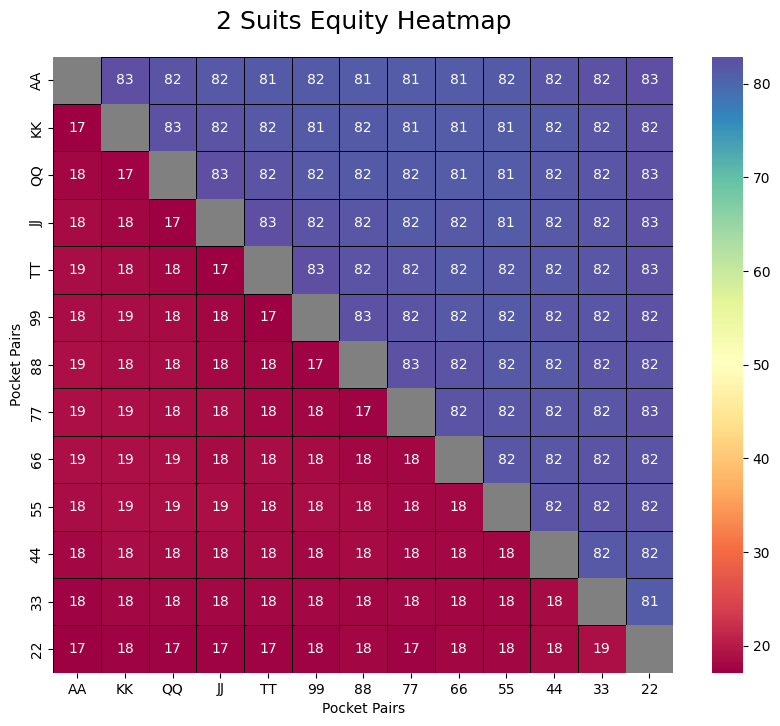

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Créer une figure pour ajuster la taille de la heatmap
plt.figure(figsize=(10, 8))

# Créer une heatmap avec un dégradé de couleur, en spécifiant les valeurs min et max
sns.heatmap(twosuits_df, annot=True, cmap='Spectral', vmin=min_value, vmax=max_value, cbar=True, linewidths=.5, linecolor='black')

# Ajouter une diagonale grise pour distinguer les paires identiques
for i in range(len(twosuits_df)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='grey', lw=0))

# Ajuster les labels et le titre
plt.title("2 Suits Equity Heatmap", fontsize=18, pad=20)
plt.xlabel("Pocket Pairs")
plt.ylabel("Pocket Pairs")

# Afficher le graphique
plt.show()


In [27]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Remplacer None par NaN si ce n'est pas déjà fait
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Fonction pour mapper les valeurs à des couleurs
def value_to_color(val):
    norm = (val - min_value) / (max_value - min_value)  # Normaliser la valeur entre 0 et 1
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["violet", "blue", "cyan", "green", "yellow", "orange", "red"])
    color = cmap(norm)
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

# Appliquer la fonction à chaque cellule du DataFrame
twosuits_styled = twosuits_df.style.applymap(lambda val: value_to_color(val) if not pd.isna(val) else '')

# Afficher le DataFrame stylé
twosuits_styled


<ipython-input-27-b37e2a718228>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)
<ipython-input-27-b37e2a718228>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  twosuits_styled = twosuits_df.style.applymap(lambda val: value_to_color(val) if not pd.isna(val) else '')


,AA,KK,QQ,JJ,TT,99,88,77,66,55,44,33,22
AA,nan,82.640000,82.230000,81.820000,81.410000,81.530000,81.120000,81.140000,81.110000,81.550000,82.000000,82.440000,82.890000
KK,17.360000,nan,82.620000,82.220000,81.810000,81.480000,81.540000,81.130000,81.150000,81.140000,81.580000,82.030000,82.470000
QQ,17.770000,17.380000,nan,82.660000,82.250000,81.860000,81.540000,81.590000,81.180000,81.170000,81.620000,82.060000,82.510000
JJ,18.180000,17.780000,17.340000,nan,82.680000,82.290000,81.910000,81.580000,81.630000,81.200000,81.640000,82.090000,82.530000
TT,18.590000,18.190000,17.750000,17.320000,nan,82.690000,82.310000,81.920000,81.600000,81.620000,81.640000,82.080000,82.530000
99,18.470000,18.520000,18.140000,17.710000,17.310000,nan,82.630000,82.240000,81.860000,81.500000,81.980000,82.000000,82.450000
88,18.880000,18.460000,18.460000,18.090000,17.690000,17.370000,nan,82.510000,82.130000,81.710000,81.810000,82.290000,82.310000
77,18.860000,18.870000,18.410000,18.420000,18.080000,17.760000,17.490000,nan,82.330000,81.920000,81.960000,82.060000,82.540000
66,18.890000,18.850000,18.820000,18.370000,18.400000,18.140000,17.870000,17.670000,nan,82.050000,82.090000,82.130000,82.230000
55,18.450000,18.860000,18.830000,18.800000,18.380000,18.500000,18.290000,18.080000,17.950000,nan,82.170000,82.210000,82.250000


<ipython-input-28-3f43cf78b28f>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


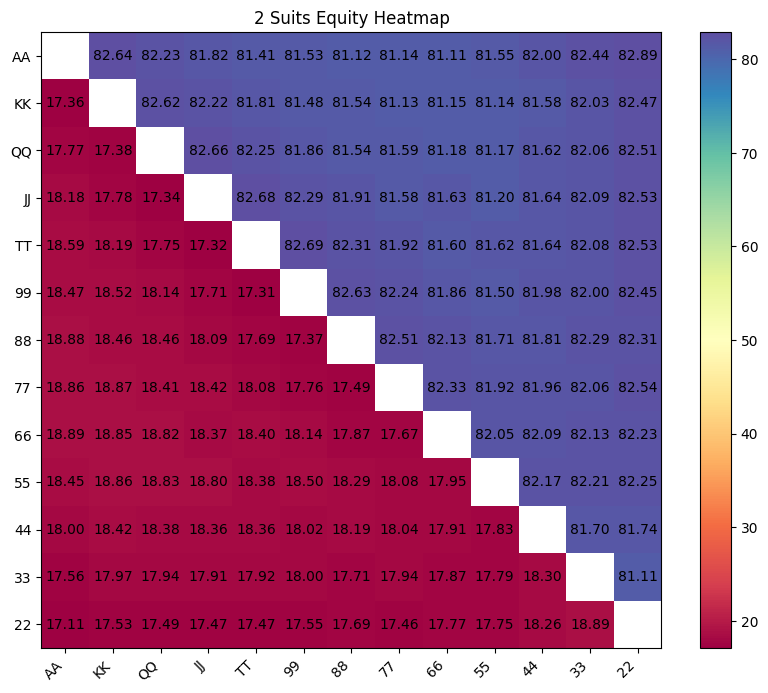

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assurer que le DataFrame ne contient pas de valeurs None
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Convertir le DataFrame en tableau de valeurs
data = twosuits_df.to_numpy()

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = np.nanmin(data)
max_value = np.nanmax(data)

# Utiliser imshow pour afficher une heatmap
cax = ax.imshow(data, cmap='Spectral', aspect='auto', vmin=min_value, vmax=max_value)

# Ajouter une barre de couleur
cbar = fig.colorbar(cax)

# Ajouter les annotations (les valeurs) dans les cellules
for (i, j), val in np.ndenumerate(data):
    if not np.isnan(val):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Configurer les ticks des axes
ax.set_xticks(np.arange(len(twosuits_df.columns)))
ax.set_yticks(np.arange(len(twosuits_df.index)))
ax.set_xticklabels(twosuits_df.columns)
ax.set_yticklabels(twosuits_df.index)

# Ajuster la disposition pour que les étiquettes ne soient pas coupées
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('2 Suits Equity Heatmap')

plt.show()


<ipython-input-29-27a3138a810c>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


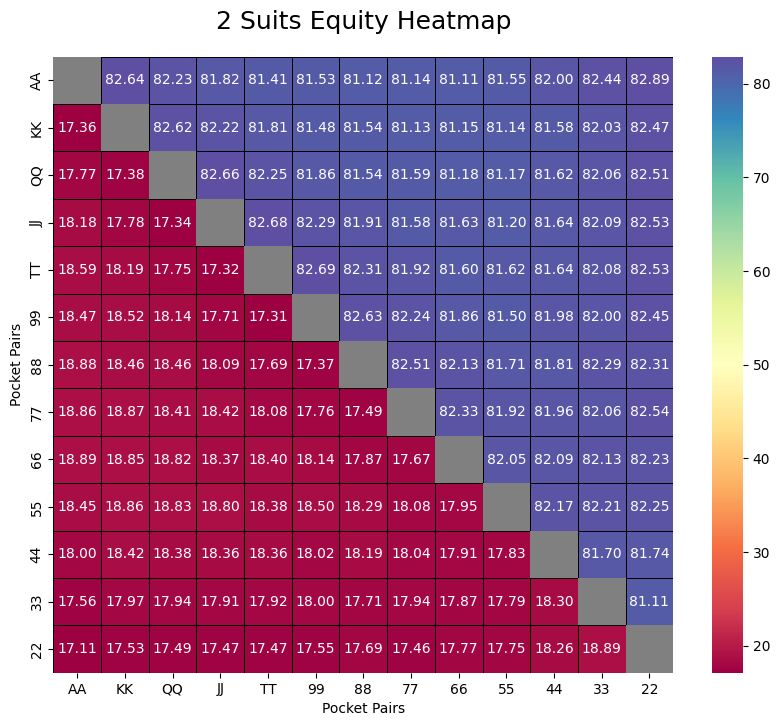

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assurer que le DataFrame ne contient pas de valeurs None
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Créer une figure
plt.figure(figsize=(10, 8))

# Créer une heatmap avec sns, en spécifiant vmin et vmax pour s'assurer que le dégradé couvre toute la plage des valeurs
sns.heatmap(twosuits_df, cmap='Spectral', annot=True, fmt=".2f", cbar=True, vmin=min_value, vmax=max_value, linewidths=.5, linecolor='black')

# Ajouter une diagonale grise pour les paires identiques
for i in range(len(twosuits_df)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='grey', lw=0))

# Configurer les labels et le titre
plt.title("2 Suits Equity Heatmap", fontsize=18, pad=20)
plt.xlabel("Pocket Pairs")
plt.ylabel("Pocket Pairs")

plt.show()


<ipython-input-30-27a3138a810c>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


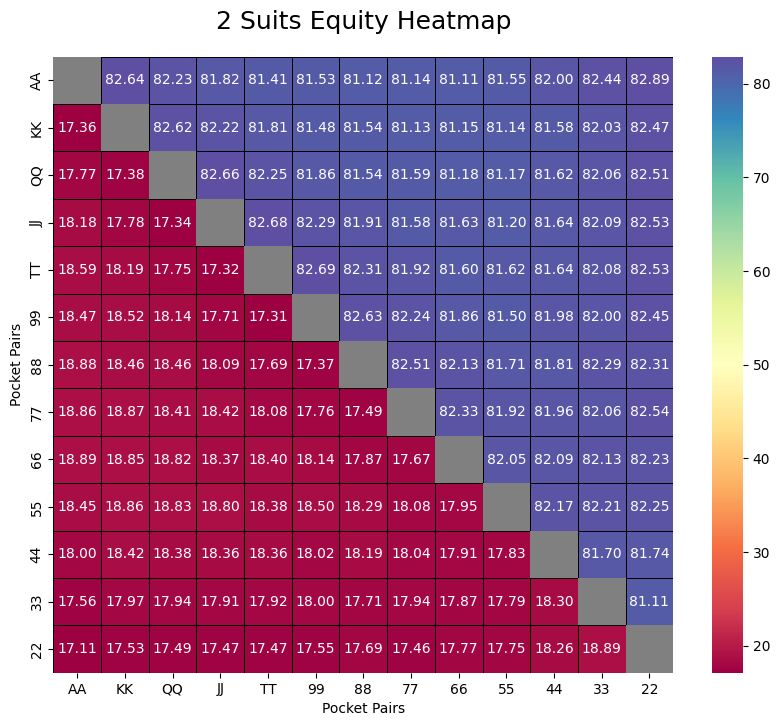

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assurer que le DataFrame ne contient pas de valeurs None
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Créer une figure
plt.figure(figsize=(10, 8))

# Créer une heatmap avec sns, en spécifiant vmin et vmax pour s'assurer que le dégradé couvre toute la plage des valeurs
sns.heatmap(twosuits_df, cmap='Spectral', annot=True, fmt=".2f", cbar=True, vmin=min_value, vmax=max_value, linewidths=.5, linecolor='black')

# Ajouter une diagonale grise pour les paires identiques
for i in range(len(twosuits_df)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=True, color='grey', lw=0))

# Configurer les labels et le titre
plt.title("2 Suits Equity Heatmap", fontsize=18, pad=20)
plt.xlabel("Pocket Pairs")
plt.ylabel("Pocket Pairs")

plt.show()


<ipython-input-31-fcda10ccc601>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)


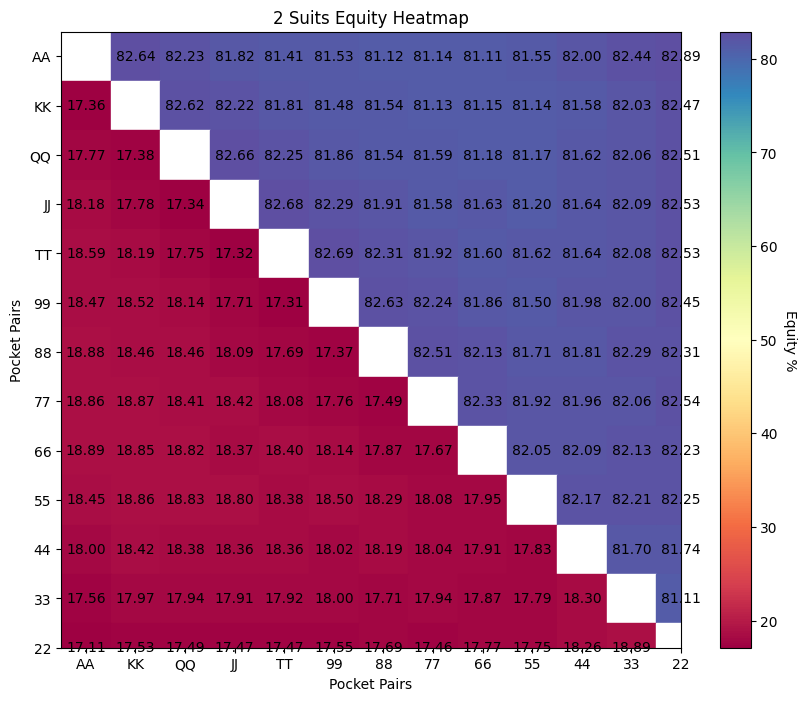

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assurer que le DataFrame ne contient pas de valeurs None
twosuits_df = twosuits_df.applymap(lambda x: np.nan if x is None else x)

# Déterminer les valeurs minimales et maximales du DataFrame
min_value = twosuits_df.min().min()
max_value = twosuits_df.max().max()

# Créer une fonction de normalisation
norm = mcolors.Normalize(vmin=min_value, vmax=max_value)

# Créer une carte de couleurs personnalisée
cmap = plt.get_cmap("Spectral")

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(10, 8))

# Mapper chaque valeur à une couleur
for (i, j), val in np.ndenumerate(twosuits_df.values):
    color = cmap(norm(val)) if not np.isnan(val) else (1, 1, 1, 1)
    ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
    ax.text(j + 0.5, i + 0.5, f'{val:.2f}' if not np.isnan(val) else '', ha='center', va='center', color='black')

# Configurer les labels des axes
ax.set_xticks(np.arange(len(twosuits_df.columns)) + 0.5)
ax.set_yticks(np.arange(len(twosuits_df.index)) + 0.5)
ax.set_xticklabels(twosuits_df.columns)
ax.set_yticklabels(twosuits_df.index)

# Inverser l'axe y pour que les étiquettes soient dans l'ordre correct
ax.invert_yaxis()

# Ajouter une barre de couleur
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.ax.set_ylabel('Equity %', rotation=-90, va="bottom")

# Ajuster les marges
plt.title('2 Suits Equity Heatmap')
plt.xlabel('Pocket Pairs')
plt.ylabel('Pocket Pairs')
plt.grid(False)
plt.show()
